## Time Series Challenge
In this challenge, we will compare the various time series prediction techniques on the dataset we can find [here](https://drive.google.com/file/d/1pgZlxluv5_cbgwR5JSWu4njbYXo_06Eb/view?usp=sharing).

- moving average
- ARIMA
- Prophet
- (Stretch) LSTMs

There are several item categories in this sales dataset. You can choose your own category or predict the overall sales.

> #### Note
> We have one order in every row, thus don't forget to transform the data into a time series format first. The data can be transformed into a daily, weekly or monthly time series.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

C:\Users\bevli\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
df = pd.read_excel(r"C:\Users\bevli\Downloads\time_series_exercise\Sample - Superstore.xls")

In [8]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [35]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [36]:
timeseries = df[['Order Date','Profit']]
timeseries

,Order Date,Profit
0,2016-11-08,41.9136
1,2016-11-08,219.5820
2,2016-06-12,6.8714
3,2015-10-11,-383.0310
4,2015-10-11,2.5164
...,...,...
9989,2014-01-21,4.1028
9990,2017-02-26,15.6332
9991,2017-02-26,19.3932
9992,2017-02-26,13.3200


In [37]:
timeseries['Order Date'] = pd.to_datetime(df['Order Date'])
timeseries = timeseries.sort_values(by = 'Order Date').reindex()

C:\Users\bevli\AppData\Local\Temp/ipykernel_27124/3504679378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeseries['Order Date'] = pd.to_datetime(df['Order Date'])


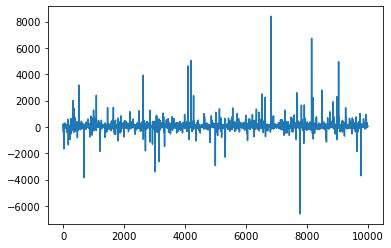

In [46]:
plt.plot(df['Profit'])

In [42]:
#null hypothesis
from statsmodels.tsa.stattools import adfuller 


def ADF_Stationarity_Test(timeseries, significance_level):
    result = adfuller(timeseries, store = True)
    if result[1]>significance_level:
        print("Pvalue {} is over sig level {}, fail to reject null hypothesis that time series is non stationary.".format(result[1],significance_level))
    else:
        print("Pvalue {} is under sig level {}, reject null hypothesis that timeseries is non stationary.".format(result[1],significance_level))

In [45]:
ADF_Stationarity_Test(timeseries['Profit'], 0.05)

Pvalue 0.0 is under sig level 0.05, reject null hypothesis that timeseries is non stationary.


### Moving Average

Test MSE: 72866.562
Test MSE: 269.938


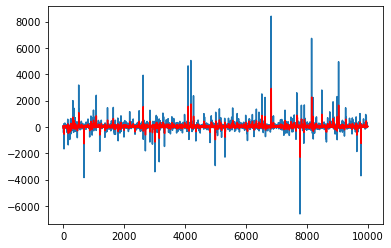

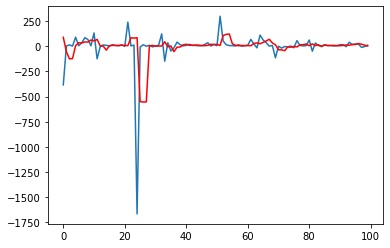

In [53]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from numpy import mean


X = timeseries['Profit']
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
print('Test MSE: %.3f' % np.sqrt(metrics.mean_squared_error(test, predictions)))


# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# zoom plot
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()

### ARIMA

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

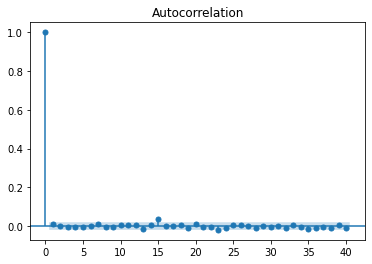

In [55]:
plot_acf(timeseries['Profit'])
plt.show()

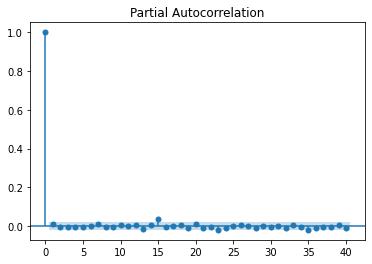

In [56]:
plot_pacf(timeseries['Profit'])
plt.show()

In [69]:
from sklearn import metrics
from statsmodels.tsa.arima.model import ARIMA

# split into train and test sets

df_final = timeseries.Profit
size = int(len(df_final) * 0.66)
train, test = df_final[0:size], df_final[size:len(df_final)]
history = [x for x in train]
predictions = list()

In [72]:
len(history)

6596

In [76]:
len(predictions)

0

In [87]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    print ("row", t)
    yhat = output[0]
    predictions.append(yhat) 
# obs = test[t]
# history.append(obs)
# print('predicted=%f, expected=%f' % (yhat, obs))


row 0
row 1
row 2
row 3
row 4
row 5
row 6
row 7
row 8
row 9
row 10
row 11
row 12
row 13
row 14
row 15
row 16
row 17
row 18
row 19
row 20
row 21
row 22
row 23
row 24
row 25
row 26
row 27
row 28
row 29
row 30
row 31
row 32
row 33
row 34
row 35
row 36
row 37
row 38
row 39
row 40
row 41
row 42
row 43
row 44
row 45
row 46
row 47
row 48
row 49
row 50
row 51
row 52
row 53
row 54
row 55
row 56
row 57
row 58
row 59
row 60
row 61
row 62
row 63
row 64
row 65
row 66
row 67
row 68
row 69
row 70
row 71
row 72
row 73
row 74
row 75
row 76
row 77
row 78
row 79
row 80
row 81
row 82
row 83
row 84
row 85
row 86
row 87
row 88
row 89
row 90
row 91
row 92
row 93
row 94
row 95
row 96
row 97
row 98
row 99
row 100
row 101
row 102
row 103
row 104
row 105
row 106
row 107
row 108
row 109
row 110
row 111
row 112
row 113
row 114
row 115
row 116
row 117
row 118
row 119
row 120
row 121
row 122
row 123
row 124
row 125
row 126
row 127
row 128
row 129
row 130
row 131
row 132
row 133
row 134
row 135
row 136
row 137
row 13

row 1034
row 1035
row 1036
row 1037
row 1038
row 1039
row 1040
row 1041
row 1042
row 1043
row 1044
row 1045
row 1046
row 1047
row 1048
row 1049
row 1050
row 1051
row 1052
row 1053
row 1054
row 1055
row 1056
row 1057
row 1058
row 1059
row 1060
row 1061
row 1062
row 1063
row 1064
row 1065
row 1066
row 1067
row 1068
row 1069
row 1070
row 1071
row 1072
row 1073
row 1074
row 1075
row 1076
row 1077
row 1078
row 1079
row 1080
row 1081
row 1082
row 1083
row 1084
row 1085
row 1086
row 1087
row 1088
row 1089
row 1090
row 1091
row 1092
row 1093
row 1094
row 1095
row 1096
row 1097
row 1098
row 1099
row 1100
row 1101
row 1102
row 1103
row 1104
row 1105
row 1106
row 1107
row 1108
row 1109
row 1110
row 1111
row 1112
row 1113
row 1114
row 1115
row 1116
row 1117
row 1118
row 1119
row 1120
row 1121
row 1122
row 1123
row 1124
row 1125
row 1126
row 1127
row 1128
row 1129
row 1130
row 1131
row 1132
row 1133
row 1134
row 1135
row 1136
row 1137
row 1138
row 1139
row 1140
row 1141
row 1142
row 1143
row 1144
r

row 1945
row 1946
row 1947
row 1948
row 1949
row 1950
row 1951
row 1952
row 1953
row 1954
row 1955
row 1956
row 1957
row 1958
row 1959
row 1960
row 1961
row 1962
row 1963
row 1964
row 1965
row 1966
row 1967
row 1968
row 1969
row 1970
row 1971
row 1972
row 1973
row 1974
row 1975
row 1976
row 1977
row 1978
row 1979
row 1980
row 1981
row 1982
row 1983
row 1984
row 1985
row 1986
row 1987
row 1988
row 1989
row 1990
row 1991
row 1992
row 1993
row 1994
row 1995
row 1996
row 1997
row 1998
row 1999
row 2000
row 2001
row 2002
row 2003
row 2004
row 2005
row 2006
row 2007
row 2008
row 2009
row 2010
row 2011
row 2012
row 2013
row 2014
row 2015
row 2016
row 2017
row 2018
row 2019
row 2020
row 2021
row 2022
row 2023
row 2024
row 2025
row 2026
row 2027
row 2028
row 2029
row 2030
row 2031
row 2032
row 2033
row 2034
row 2035
row 2036
row 2037
row 2038
row 2039
row 2040
row 2041
row 2042
row 2043
row 2044
row 2045
row 2046
row 2047
row 2048
row 2049
row 2050
row 2051
row 2052
row 2053
row 2054
row 2055
r

row 2856
row 2857
row 2858
row 2859
row 2860
row 2861
row 2862
row 2863
row 2864
row 2865
row 2866
row 2867
row 2868
row 2869
row 2870
row 2871
row 2872
row 2873
row 2874
row 2875
row 2876
row 2877
row 2878
row 2879
row 2880
row 2881
row 2882
row 2883
row 2884
row 2885
row 2886
row 2887
row 2888
row 2889
row 2890
row 2891
row 2892
row 2893
row 2894
row 2895
row 2896
row 2897
row 2898
row 2899
row 2900
row 2901
row 2902
row 2903
row 2904
row 2905
row 2906
row 2907
row 2908
row 2909
row 2910
row 2911
row 2912
row 2913
row 2914
row 2915
row 2916
row 2917
row 2918
row 2919
row 2920
row 2921
row 2922
row 2923
row 2924
row 2925
row 2926
row 2927
row 2928
row 2929
row 2930
row 2931
row 2932
row 2933
row 2934
row 2935
row 2936
row 2937
row 2938
row 2939
row 2940
row 2941
row 2942
row 2943
row 2944
row 2945
row 2946
row 2947
row 2948
row 2949
row 2950
row 2951
row 2952
row 2953
row 2954
row 2955
row 2956
row 2957
row 2958
row 2959
row 2960
row 2961
row 2962
row 2963
row 2964
row 2965
row 2966
r

In [105]:
#evaluate forecasts
rmse = np.sqrt(metrics.mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

len(output)

ValueError: Found input variables with inconsistent numbers of samples: [3398, 3503]

In [100]:
predictions

[28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973879883,
 28.542781973